In [1]:
from sensitivity_tests import *
import pandas as pd
from utilities import *

In [ ]:
massey = MasseyRankingAlgorithm()
colley = ColleyRankingAlgorithm()

eloTournament = SynthELOTournamentSource(10, 5, 80, 800)
competitiveELOTournament = SynthELOTournamentSource(10, 3, 8, 800)

eloMatrix = eloTournament.init_D()

massey_ranks = []
P_sets = []
for i in range(100):
    compELOMatrix = competitiveELOTournament.init_D()

    k, details = pyrankability.hillside.bilp(compELOMatrix, num_random_restarts=15, find_pair=True)

    #sampled_dist.append(l2dm._compute(k, details["P"]))
    massey_ranks.append(massey.rank(compELOMatrix))
    P_sets.append(set(details["P"]))

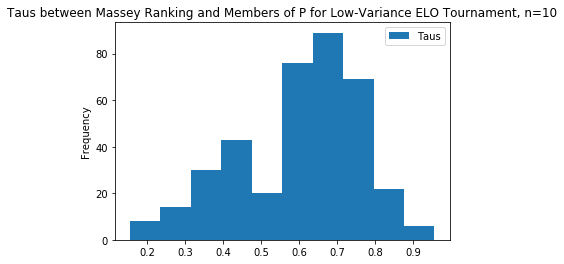

In [31]:
taus = []
for k in range(len(massey_ranks)):
    #print(massey_ranks[k], end='         ')
    #print(P_sets[k])
    for o in range(len(list(P_sets[k]))):
        taus.append(kendall_tau(massey_ranks[k], list(P_sets[k])[o]))
tausdf = pd.DataFrame({"Taus": taus})
tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10")

In [ ]:
colley = ColleyRankingAlgorithm()

competitiveELOTournament = SynthELOTournamentSource(10, 1, 8, 800)
competitiveELOTournament.init_D()

colley_ranks = []
P_sets_c = []
for i in range(100):
    compELOMatrix = competitiveELOTournament.init_D()

    k, details = pyrankability.hillside.bilp(compELOMatrix, num_random_restarts=15, find_pair=True)

    #sampled_dist.append(l2dm._compute(k, details["P"]))
    colley_ranks.append(massey.rank(compELOMatrix))
    P_sets_c.append(set(details["P"]))

[2, 4, 6, 8, 3, 0, 5, 1, 7, 9]         {(4, 2, 0, 8, 9, 3, 6, 5, 1, 7), (4, 2, 6, 9, 0, 8, 3, 5, 1, 7), (4, 2, 8, 9, 0, 3, 6, 5, 1, 7), (4, 2, 6, 8, 9, 0, 3, 5, 1, 7), (4, 2, 9, 0, 8, 3, 6, 5, 1, 7)}
[4, 7, 2, 1, 5, 0, 6, 3, 8, 9]         {(4, 7, 2, 1, 9, 0, 5, 6, 3, 8), (7, 4, 2, 1, 9, 0, 5, 6, 3, 8)}
[0, 3, 6, 1, 4, 2, 8, 5, 7, 9]         {(0, 6, 3, 1, 9, 4, 8, 2, 5, 7), (0, 3, 6, 1, 9, 4, 8, 2, 5, 7)}
[4, 6, 7, 2, 1, 0, 8, 3, 5, 9]         {(4, 7, 6, 9, 2, 1, 3, 0, 8, 5), (4, 6, 7, 2, 9, 1, 0, 3, 8, 5), (4, 6, 7, 9, 2, 1, 0, 8, 3, 5), (4, 6, 7, 2, 9, 1, 0, 8, 3, 5), (4, 6, 7, 9, 2, 1, 0, 3, 8, 5)}
[7, 5, 8, 0, 3, 1, 4, 6, 2, 9]         {(9, 7, 5, 8, 0, 3, 4, 1, 6, 2), (9, 7, 5, 8, 0, 3, 1, 4, 6, 2)}
[7, 8, 1, 3, 6, 5, 2, 0, 4, 9]         {(7, 1, 8, 6, 5, 3, 2, 4, 0, 9), (1, 7, 8, 6, 5, 3, 2, 4, 9, 0), (7, 1, 8, 6, 5, 3, 2, 4, 9, 0), (1, 7, 8, 6, 5, 3, 2, 4, 0, 9)}
[4, 6, 8, 3, 1, 7, 5, 0, 2, 9]         {(9, 8, 4, 6, 3, 1, 5, 2, 0, 7), (9, 4, 8, 6, 3, 1, 5, 2, 0, 7)}
[7, 0, 4, 6, 3, 

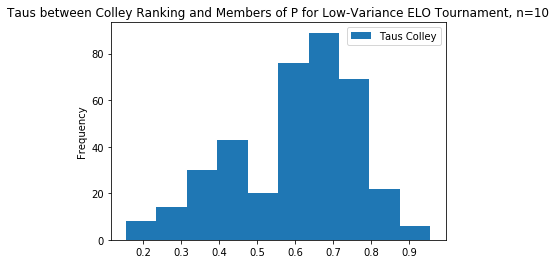

In [45]:
colley_ranks
P_sets_c
tausc = []
for k in range(len(colley_ranks)):
    #print(massey_ranks[k], end='         ')
    #print(P_sets[k])
    for o in range(len(list(P_sets[k]))):
        tausc.append(kendall_tau(massey_ranks[k], list(P_sets[k])[o]))
tausc
tauscdf = pd.DataFrame({"Taus Colley": tausc})
tauscdf.plot.hist("Taus Colley", title="Taus between Colley Ranking and Members of P for Low-Variance ELO Tournament, n=10")